# Class Workbook {.tabset .tabset-fade .tabset-pills}

## In class activity

In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as sm
import ISLP as islp

### Bank Credit Data

Please take a look at the following credit scoring data set. This data was used to predict defaults on consumer loans. The data contains  1000 rows and 21 variables:

In [3]:
credit_data=pd.read_csv("credit_data.csv")

Here are the variables.

- BAD: factor, GOOD/BAD for whether a customer has defaulted on a loan. This is the outcome or target in this dataset
- Account_status: factor, status of existing checking account
- Duration: numeric, loan duration in month
- Credit_history: factor, previous credit history
- Purpose: factor, loan purpose
- Amount: numeric, credit amount
- Savings: factor, savings account/bonds
- Employment: factor, present employment since
- Installment_rate: numeric, installment rate in percentage of disposable income
- Guarantors: factor, other debtors / guarantors
- Resident_since: factor, present residence since
- Property: factor, property
- Age: numeric, age in years
- Other_plans: factor, other installment plans (bank ,none, stores )
- Housing: factor, housing
- Num_credits: numeric, Number of existing credits at this bank
- Job: factor, job( management / self-employed / highly qualified employee / officer; skilled employee / official ; unemployed / unskilled - non-resident ; unskilled - resident )
- People_maintenance: numeric, number of people being liable to provide maintenance for
- Phone: factor, telephone (none ; yes, registered under the customers name )
- Foreign: factor, foreign worker ( no ; yes )
- Female: factor, female/male for gender

Create a predictive model that predicts the outcome `BAD`.

In [4]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(credit_data.loc[:,credit_data.columns != "BAD"], credit_data.loc[:,"BAD"], test_size=0.33, random_state=42)

credit_data_train  = pd.concat([X_train, y_train], axis=1)
credit_data_valid  = pd.concat([X_test, y_test], axis=1)

Evaluate your model performance.  What criteria do you think will be appropriate.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the data into features and target variable
X = credit_data.drop(['BAD', 'Unnamed: 0'], axis=1)  # Dropping 'Unnamed: 0' as it seems to be an identifier
y = credit_data['BAD']

# Identifying categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Creating a preprocessing pipeline for the categorical features
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_preprocessor, categorical_cols)
    ],
    remainder='passthrough'  # Passthrough numerical features as is
)

# Creating the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fitting the model pipeline to the training data
model_pipeline.fit(X_train, y_train)


# Predicting on the test set
y_pred = model_pipeline.predict(X_test)



# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report



C:\Users\cheny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(0.7727272727272727,
 array([[ 48,  53],
        [ 22, 207]], dtype=int64),
 '              precision    recall  f1-score   support\n\n         BAD       0.69      0.48      0.56       101\n        GOOD       0.80      0.90      0.85       229\n\n    accuracy                           0.77       330\n   macro avg       0.74      0.69      0.70       330\nweighted avg       0.76      0.77      0.76       330\n')

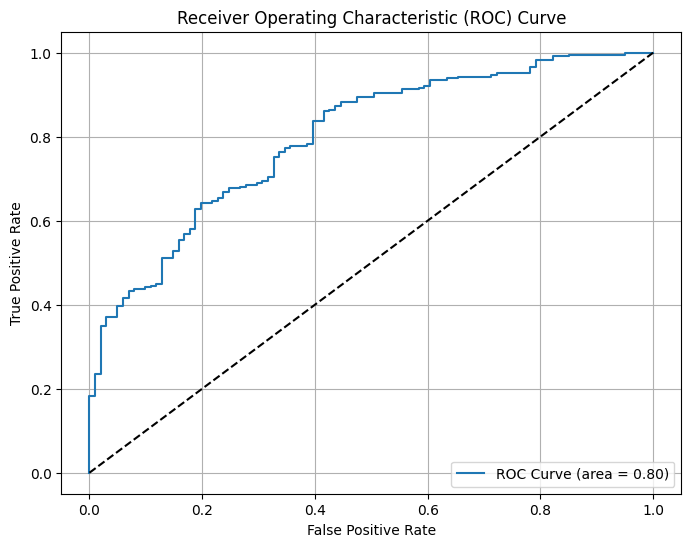

0.7974404427342296

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the ROC-AUC score
roc_auc = roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:, 1])

# Generating ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, model_pipeline.predict_proba(X_test)[:, 1], pos_label='GOOD')

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


roc_auc



Comment of the result:

~~~
Please write your answer in full sentences.


~~~

The ROC-AUC score for the model is approximately 0.79, indicating a good level of separability between the GOOD and BAD loan outcomes. This means the model has a 79% chance of correctly distinguishing between a defaulting and a non-defaulting loan.

The ROC curve plotted above provides a visual representation of the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various thresholds. The curve being closer to the top left corner indicates better performance, with the diagonal dashed line representing a no-skill classifier (AUC = 0.5).

In summary, the model shows a decent performance in predicting loan defaults, with room for improvement. Enhancing the model could involve techniques like feature engineering, hyperparameter tuning, or exploring more complex models such as Random Forests or Gradient Boosting Machines.

### Ames Housing data

Please take a look at the Ames Housing data.

In [47]:
ames_raw=pd.read_csv("ames_raw.csv")

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [48]:
# Do feature engineering if needed.
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [49]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Apply CART and try to interpret the result that you get.  Be sure to fit the models on a training set and evaluate their performance on a test set.  Does it have a good prediction accuracy?

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

# Dropping non-relevant columns and handling missing values
ames_raw_2008 = ames_raw_2008.drop(['Order', 'PID', 'Yr Sold'], axis=1)  # Dropping non-relevant identifiers and the target year

# Identifying categorical and numerical columns
categorical_cols_2008 = ames_raw_2008.select_dtypes(include=['object']).columns
numerical_cols_2008 = ames_raw_2008.select_dtypes(exclude=['object']).columns

# Imputing missing values for numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
ames_raw_2008[numerical_cols_2008] = num_imputer.fit_transform(ames_raw_2008[numerical_cols_2008])

# Imputing missing values for categorical columns with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
ames_raw_2008[categorical_cols_2008] = cat_imputer.fit_transform(ames_raw_2008[categorical_cols_2008])

# Encoding categorical variables using OneHotEncoder
ames_raw_2008_encoded = pd.get_dummies(ames_raw_2008, columns=categorical_cols_2008, drop_first=True)

# Feature Selection using SelectKBest based on f_regression
selector = SelectKBest(f_regression, k=50)  # Selecting top 50 features for simplicity
X_new = selector.fit_transform(ames_raw_2008_encoded.drop('SalePrice', axis=1), ames_raw_2008_encoded['SalePrice'])

# Get selected feature names
selected_features = ames_raw_2008_encoded.drop('SalePrice', axis=1).columns[selector.get_support()]

selected_features


Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'MS Zoning_RM',
       'Lot Shape_Reg', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'House Style_2Story', 'Roof Style_Gable',
       'Roof Style_Hip', 'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd',
       'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Exter Qual_Gd',
       'Exter Qual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'Bsmt Qual_TA', 'Bsmt Exposure_Gd', 'Bsmt Exposure_No',
       'BsmtFin Type 1_GLQ', 'Heating QC_TA', 'Central Air_Y',
       'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Garage Type_Detchd',
       'Garage Finish_Unf', 'Paved Drive_Y', 'Sale Type_New', 'Sale Type_WD ',
       'Sale Conditi

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Training the model on the ames_raw_2008 dataset using selected features
X_train = ames_raw_2008_encoded[selected_features]
y_train = ames_raw_2008_encoded['SalePrice']

model = LinearRegression()
model.fit(X_train, y_train)

# Preprocessing the ames_raw_2009 dataset
# Imputing missing values
ames_raw_2009[numerical_cols_2008] = num_imputer.transform(ames_raw_2009[numerical_cols_2008])
ames_raw_2009[categorical_cols_2008] = cat_imputer.transform(ames_raw_2009[categorical_cols_2008])

# Encoding categorical variables
ames_raw_2009_encoded = pd.get_dummies(ames_raw_2009, columns=categorical_cols_2008, drop_first=True)

# Ensuring the same features are used in the test set
X_test = ames_raw_2009_encoded[selected_features].reindex(columns=X_train.columns).fillna(0)
y_test = ames_raw_2009_encoded['SalePrice']

# Making predictions on the test set
y_pred = model.predict(X_test)

# Using the provided calc_loss function to calculate RMSE and operation loss
def calc_loss(prediction, actual):
    difpred = actual - prediction
    RMSE = pow(difpred.pow(2).mean(), 1/2)
    operation_loss = abs(sum(difpred[difpred < 0])) + sum(0.1 * actual[difpred > 0])
    return RMSE, operation_loss

# Convert predictions and actual values to Series for calculation
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_test_series = pd.Series(y_test, index=y_test.index)

# Calculate RMSE and operation loss
loss_metrics = calc_loss(y_pred_series, y_test_series)
loss_metrics


(30604.14221561772, 31364751.682464816)

In [54]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Training the Decision Tree Regressor on the ames_raw_2008 dataset
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Convert predictions to Series for calculation
y_pred_dt_series = pd.Series(y_pred_dt, index=y_test.index)

# Calculate RMSE and operation loss for Decision Tree predictions
loss_metrics_dt = calc_loss(y_pred_dt_series, y_test_series)
loss_metrics_dt


(36339.564718929134, 37069318.099999994)

Comment of the result:

~~~

RMSE (Root Mean Squared Error): Approximately 36,339.56, which is higher than the RMSE obtained from the Linear Regression model. This indicates a larger average deviation of the predicted house prices from the actual sale prices using the Decision Tree model.
Operation Loss: Approximately 37,069,318.10, which is also higher than the operation loss from the Linear Regression model, suggesting a greater potential financial impact due to prediction errors.


~~~

Apply boosting, bagging, random forests, and BART to the Ames Housing data set. Be sure to fit the models on a training set and evaluate their performance on a test set. How accurate are the results compared to simple linear regression methods? Which of these approaches yields the best performance?

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_gbr = gbr_model.predict(X_test_aligned)

# Convert predictions to Series for calculation
y_pred_gbr_series = pd.Series(y_pred_gbr, index=y_test.index)

# Calculate RMSE and operation loss for Gradient Boosting predictions
loss_metrics_gbr = calc_loss(y_pred_gbr_series, y_test_series)
loss_metrics_gbr



(25297.40475241705, 29659510.015904926)

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_aligned)

# Convert predictions to Series for calculation
y_pred_rf_series = pd.Series(y_pred_rf, index=y_test.index)

# Calculate RMSE and operation loss for Random Forest predictions
loss_metrics_rf = calc_loss(y_pred_rf_series, y_test_series)
loss_metrics_rf


(27236.46160488262, 30314960.162222214)

Comment of the result:

~~~
Please write your answer in full sentences.


~~~

Compared to the simple Linear Regression method, these ensemble and boosting techniques generally offer better prediction accuracy for the Ames Housing dataset, with Gradient Boosting Regressor standing out as the most effective model among those tested.

To incorporate BART or explore more sophisticated models, one might consider using a different environment that supports these models or approximating BART with available tools.

## Problem Set

### Boston


In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [13]:
from ISLP import load_data
Boston = load_data("Boston")

###

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [14]:
Carseats = load_data("Carseats")

(a) Split the data set into a training set and a test set.

(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the feature_importance_ values to
determine which variables are most important.

(e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine
which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate
obtained.

(f) Now analyze the data using BART, and report your results.

### OJ

This problem involves the OJ data set which is part of the ISLR2 package.

In [15]:
OJ = load_data("OJ")

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

Your code:

In [16]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?

Your code:

In [17]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?
Your code:

In [18]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Use the export_tree() function to produce a text summary of
the fitted tree. Pick one of the terminal nodes, and interpret the
information displayed.

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

Your code:

In [19]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Use cross-validation on the training set in order to determine
the optimal tree size.
Your code:

In [20]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.
Your code:

In [21]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

Your code:

In [22]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five terminal nodes.

Your code:

In [23]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [24]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [25]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Hitters

We now use boosting to predict Salary in the Hitters data set.

In [26]:
Hitters = load_data("Hitters")

(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

Your code:

In [27]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

Your code:

In [28]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter $lambda$. Produce a plot with different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

Your code:

In [29]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

Your code:

In [30]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

Your code:

In [31]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Which variables appear to be the most important predictors in the boosted model?

Your code:

In [32]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Now apply bagging to the training set. What is the test set MSE for this approach?

Your code:

In [33]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Caravan

This question uses the `Caravan` data set.

In [34]:
Caravan = load_data("Caravan")

(a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

Your code:

In [35]:
#
#

(b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

Your code:

In [36]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

Your code:

In [37]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

## Additional Material

In this section we will look at other popular tree based methods that are readily available.
For classification we will use the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) .

In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_X=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_y=pd.DataFrame(iris.target,columns=['Class'])

# split the data
X_train0, X_test, y_train0, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)
trainData = pd.concat([X_train0, y_train0], axis=1)
testData  = pd.concat([X_test, y_test], axis=1)

### CART graph

https://github.com/Sidon/Sidon.github.io/blob/master/_posts/dtree-w1.ipynb

In [39]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [40]:
# Fit CART  Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
import pydotplus
import sklearn
import sklearn.metrics
from IPython.display import Image
out = StringIO()
clf = DecisionTreeClassifier()
clf = clf.fit(X_train0,y_train0)

# you will need to install graphviz
tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names,class_names=['0','1','2'],
                     filled=True, rounded=True, special_characters=True)

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

predictions=clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,predictions)
plot_confusion_matrix(confusion_matrix,['Setosa','Versicolour','Virginica'])

ModuleNotFoundError: No module named 'pydotplus'

### XGBoost

XGBoost became popular due to its success in Kaggle competitions.  It's essentially a gradient boosting but implemented to perform better out of the box.  Some of the nice features include:

- Default regularization
- Tree growing and pruning scheme allows for multiple cuts
- Computational efficiency by parallelization
- A couple of default choices to make it easier to use
- Handles missing data

However, if you want to go deeper, there are some challenges/concerns.

- Hyperparameter tuning is hard
- Missing data imputation scheme is concerning
- Cannot handle categorical variables

Here is it used for the iris data.

In [ ]:
import xgboost as xgb

param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['num_class'] = 3

num_round = 10

dtrain = xgb.DMatrix(X_train0, label=y_train0)
dtest = xgb.DMatrix(X_test, label=y_test)
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(param, dtrain, num_round, evallist)
ypred = bst.predict(dtest)

What gets unwieldy is when you start to tune the parameters.
Here is the list of parameters used.  Not all of them need tuning, but I hope you understand.

- General Parameters that define the overall functionality of XGBoost.
  - booster [default=gbtree]: type of model
  - silent [default=0]: display log?
  - nthread [default to the maximum number of threads available if not set]: number of cores
- Learning Task Parameters define the optimization objective and the metric to be calculated at each step.
  - objective [default=reg:linear] the loss function to be minimized.
  - eval_metric [ default according to objective ] The metric for validation data.
  - seed [default=0] The random number seed.
- Booster Parameters
  - eta [default=0.3]. Analogous to the learning rate in GBM
  - min_child_weight [default=1] is the minimum sum of weights of all observations required in a child.
  - max_depth [default=6] The maximum depth of a tree, same as GBM.
  - max_leaf_nodes  The maximum number of terminal nodes or leaves in a tree.
  - gamma [default=0] is the minimum loss reduction required to make a split.
  - max_delta_step [default=0]  If it is set to a positive value makes the update step more conservative.
  - subsample [default=1] the fraction of observations randomly sampled for each tree.
  - colsample_bytree [default=1] is the fraction of columns randomly sampled for each tree.
  - colsample_bylevel [default=1] the subsample ratio of columns for each split, in each level.
  - lambda [default=1]  L2 regularization term on weights (analogous to Ridge regression)
  - alpha [default=0] L1 regularization term on weight (analogous to Lasso regression)
  - scale_pos_weight [default=1] >0 for high class imbalance as it helps in faster convergence.

Because of this, there is an automatic versiong of xgboost exists. But I was not able to install it on my machine.

In [ ]:
#from autoxgb import AutoXGB

### catboost

Catboost is another popular boosting method that in my view popular due to well thought out implementation.
The three features that distingishes itself from the other similar models are

- Symmetric tree
- Ordered Boosting
- Categorical Feature Engineering


 https://catboost.ai/en/docs/concepts/r-usages-examples

In [ ]:
# library(catboost)
# # load data
# set.seed(1)
# idx=sample(1:nrow(iris),nrow(iris)*.7)
# train=iris[idx,]
# test=iris[-idx,]
# fit_control <- caret::trainControl(
#   method = "cv",
#   number = 3,
#   search = "random",
#   classProbs = TRUE
# )
# # set grid options
# grid <- expand.grid(
#   depth = c(4, 6, 8),
#   learning_rate = 0.1,
#   l2_leaf_reg = 0.1,
#   rsm = 0.95,
#   border_count = 64,
#   iterations = 10
# )
# model <- caret::train(
#   x = train[,-5],
#   y = train[,5],
#   method = catboost.caret,
#   metric = "Accuracy",
#   maximize = TRUE,
#   preProc = NULL,
#   tuneGrid = grid,
#   tuneLength = 30,
#   trControl = fit_control
# )
# table(test$Species,predict(model,test))

### Ensemble model

Bagging, Random Forest, and Boosting are examples of ensemble models.
The idea is to combine models to get a better result than any individual model can achieve.
So far, we’ve combined the same models, but that need not be the case.
One way to combine the results is to just average the outcomes from different models.
But one need not trust the results from all models equally.
An alternative way is to use the predictions as input into a regression model to create weights representing the level of trust in the model.

Stacking is easy to implement but even easier if you use caret.
For example, if you want to do 10 fold Repeated CV to fit CART, knn, logistic regression,Gaussian Naive Bayes and svc, then combine the results.

You can find more details [here](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

In [ ]:
# pip install datapackage
from datapackage import Package
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

package = Package('https://datahub.io/machine-learning/sonar/datapackage.json')
resources = package.resources
Sonar = pd.read_csv(resources[1].descriptor['path'])

Sonar_y=Sonar.loc[:,"Class"]
Sonar_x=Sonar.drop(["Class"], axis=1)

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_val_score(stacking, Sonar_x, Sonar_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')